# Udacity Deep Reinforcement Learning course - Project 1: Navigation - Report

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import namedtuple, deque
import torch

import matplotlib.pyplot as plt
%matplotlib inline

## Learning algorithm

The general flow of the learning algorithm is roughly:
1. Initialize the environment
2. Agent selects an action based on the current state
3. The Agent executes the action, a.k.a. the environment receives the action and updates it's state
4. The agent stores receives the outcome of its action and stores the new experience
5. If the appropriate conditions are met the agent learns based on past experiences
6. The loop repeats

The hyper parameters for the DQN algorithm are similar to the ones used in the course.
* gamma = 0.99,
* tau = 1e-3,
* lr = 5e-4,
* update_every = 4,
* n_episodes=2000, 
* max_t=1000 (this value becomes irrelevant as no episode reaches this far),
* eps_start=1.0, 
* eps_end=0.01, 
* eps_decay=0.995

### Model

The current model is a Neural Network with 2 hidden densely connected layers with the gelu activation functions.
The number of nodes per layer is:
```
64, 32, 16, 1
```

## Visualize the agent

In [2]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of actions
action_size = brain.vector_action_space_size

# examine the state space 
state = env_info.vector_observations[0]

state_size = len(state)

seed = 42

In [4]:
from dqn import Agent

#instantiate agent
agent = Agent(state_size, action_size, seed, model_state_dict_path="checkpoint.pth")

In [5]:
score = 0
while True:
    action = agent.act(state, eps=0) # set eps=0 to ensure greedy approach when evaluating

    # update env
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished

    state = next_state
    score += reward

    if done:
        break
print(score)

19.0


In [6]:
env.close()

## Training Results

The Environment was solved in 398 episodes.

```
Episode 100	Average Score: 1.13
Episode 200	Average Score: 4.38
Episode 300	Average Score: 7.36
Episode 400	Average Score: 10.46
Episode 498	Average Score: 13.02
Environment solved in 398 episodes!	Average Score: 13.02
Episode 500	Average Score: 13.06
Episode 571	Average Score: 14.01
Saving better agent with Average Score: 14.01
Episode 600	Average Score: 14.60
Episode 688	Average Score: 15.07
Saving better agent with Average Score: 15.07
Episode 700	Average Score: 15.23
Episode 773	Average Score: 16.01
Saving better agent with Average Score: 16.01
Episode 800	Average Score: 15.83
Episode 900	Average Score: 15.68
Episode 1000	Average Score: 15.40
Episode 1100	Average Score: 16.52
Episode 1200	Average Score: 15.19
Episode 1300	Average Score: 16.36
Episode 1342	Average Score: 17.08
Saving better agent with Average Score: 17.08
Episode 1400	Average Score: 16.55
Episode 1500	Average Score: 16.69
Episode 1600	Average Score: 17.03
Episode 1700	Average Score: 16.33
Episode 1800	Average Score: 16.00
Episode 1900	Average Score: 15.86
Episode 2000	Average Score: 16.00
```

In [7]:
import pickle

with open('scores.pkl', 'rb') as f:
    scores = pickle.load(f)

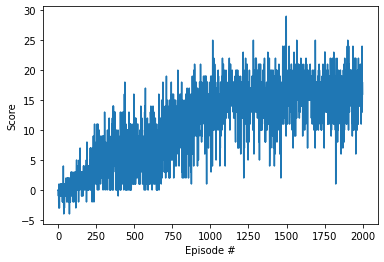

In [8]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Future work

* Implement Rainbow DQN
* Explore more NN architectures
* Hyperparameter optimization with experiment tracking